In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Dense,Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from keras.layers.advanced_activations import ReLU, PReLU
from keras.optimizers import SGD, Adam
from scipy.stats import mode

In [2]:
train_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_x_xgboost.csv')
train_y = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_y_xgboost.csv')
test_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\test_x_xgboost.csv')

In [3]:
train_x_nn = pd.read_csv('.//dataset//train_x_NN.csv')
train_y_nn = pd.read_csv('.//dataset//train_y_NN.csv')
test_x_nn = pd.read_csv('.//dataset//test_x_NN.csv')

In [4]:
from models import Model1xgb,Model1xgb2, Model1NNproba,Model1NN2proba,Model1ramdom,Model2KMeans,Model2KNN,Model3logistic

In [5]:
def predict_cv_classfier(model,train_x, train_y, test_x):
    

    preds = []
    preds_test = []
    va_idxes = []


    kf = KFold(n_splits=4, shuffle=True, random_state= 71)
    for i , (tr_idx, va_idx) in enumerate (kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    tmp = np.stack(preds_test, axis =1)
    mode_test, mode_counts = mode(tmp, axis=1)

    preds_test = mode_test
    preds_size = preds_test.shape[0]
    preds_test = preds_test.reshape(preds_size,)
    
    return pred_train, preds_test

In [6]:
def predict_cv(model, train_x, train_y, test_x):
    preds = []
    preds_test = []
    va_idxes = []
    
    kf = KFold(n_splits=4, shuffle=True, random_state=71)
    for i , (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)
        
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]
    
    preds_test = np.mean(preds_test, axis=0)
    
    return pred_train, preds_test

# K-meansを省いた

In [7]:
model1_a = Model2KNN()
pred_train_1a , preds_test_1a = predict_cv_classfier(model1_a, train_x, train_y, test_x)

model_1b = Model1xgb()
pred_train_1b, pred_test_1b = predict_cv(model_1b, train_x, train_y, test_x)

model_1c = Model1NNproba()
pred_train_1c, pred_test_1c = predict_cv(model_1c, train_x_nn, train_y, test_x_nn)


model_1d = Model1ramdom()
pred_train_1d, pred_test_1d = predict_cv(model_1d, train_x, train_y, test_x)


model_1e = Model1xgb2()
pred_train_1e, pred_test_1e = predict_cv(model_1e, train_x, train_y, test_x)

model_1f = Model1NN2proba()
pred_train_1f, pred_test_1f = predict_cv(model_1f, train_x_nn, train_y, test_x_nn)


C:\Users\odoru\SIGNATE_time_deposit_account\models.py:275: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:275: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:275: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:275: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.model.fit(tr_x, tr_y)


[14:38:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.06799	eval-error:0.07055
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 20 rounds.
[1]	train-error:0.06824	eval-error:0.07041
[2]	train-error:0.06760	eval-error:0.07070
[3]	train-error:0.06819	eval-error:0.07026
[4]	train-error:0.06716	eval-error:0.07011
[5]	train-error:0.06770	eval-error:0.06922
[6]	train-error:0.06731	eval-error:0.06937
[7]	train-error:0.06750	eval-error:0.06937
[8]	train-error:0.06741	eval-error:0.06967
[9]	train-error:0.06735	eval-error:0.06922
[10]	train-error:0.06701	eval-error:0.068

[22]	train-error:0.06622	eval-error:0.07100
[23]	train-error:0.06622	eval-error:0.07100
[24]	train-error:0.06632	eval-error:0.07055
[25]	train-error:0.06637	eval-error:0.07041
[26]	train-error:0.06627	eval-error:0.07070
[27]	train-error:0.06617	eval-error:0.07026
[28]	train-error:0.06632	eval-error:0.07055
[29]	train-error:0.06608	eval-error:0.07070
[30]	train-error:0.06593	eval-error:0.07055
[31]	train-error:0.06568	eval-error:0.07041
[32]	train-error:0.06553	eval-error:0.07085
[33]	train-error:0.06534	eval-error:0.07070
[34]	train-error:0.06519	eval-error:0.07026
[35]	train-error:0.06495	eval-error:0.07070
[36]	train-error:0.06499	eval-error:0.07100
[37]	train-error:0.06485	eval-error:0.07070
[38]	train-error:0.06460	eval-error:0.07085
[39]	train-error:0.06431	eval-error:0.07070
[40]	train-error:0.06406	eval-error:0.07100
[41]	train-error:0.06391	eval-error:0.07100
[42]	train-error:0.06376	eval-error:0.07085
[43]	train-error:0.06376	eval-error:0.07085
[44]	train-error:0.06342	eval-er

159/159 [==============================] - 1s 4ms/step - loss: 0.1797 - accuracy: 0.9380 - val_loss: 0.2122 - val_accuracy: 0.9325
Epoch 17/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1768 - accuracy: 0.9394 - val_loss: 0.2191 - val_accuracy: 0.9315
Epoch 18/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1747 - accuracy: 0.9406 - val_loss: 0.2163 - val_accuracy: 0.9302
Epoch 19/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1720 - accuracy: 0.9405 - val_loss: 0.2191 - val_accuracy: 0.9309
Epoch 20/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1703 - accuracy: 0.9420 - val_loss: 0.2193 - val_accuracy: 0.9327
Epoch 21/100
159/159 [==============================] - 1s 5ms/step - loss: 0.1673 - accuracy: 0.9422 - val_loss: 0.2212 - val_accuracy: 0.9297
Epoch 22/100
159/159 [==============================] - 1s 5ms/step - loss: 0.1647 - accuracy: 0.9419 - val_loss: 0.2213 - val_accuracy: 0.9296
Instr

159/159 [==============================] - 1s 4ms/step - loss: 0.2043 - accuracy: 0.9329 - val_loss: 0.2163 - val_accuracy: 0.9271
Epoch 5/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2014 - accuracy: 0.9336 - val_loss: 0.2171 - val_accuracy: 0.9275
Epoch 6/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2006 - accuracy: 0.9349 - val_loss: 0.2164 - val_accuracy: 0.9271
Epoch 7/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1951 - accuracy: 0.9358 - val_loss: 0.2188 - val_accuracy: 0.9258
Epoch 8/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1949 - accuracy: 0.9355 - val_loss: 0.2167 - val_accuracy: 0.9261
Epoch 9/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1936 - accuracy: 0.9356 - val_loss: 0.2198 - val_accuracy: 0.9263
Epoch 10/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1916 - accuracy: 0.9363 - val_loss: 0.2226 - val_accuracy: 0.9252
Epoch 11/1

C:\Users\odoru\SIGNATE_time_deposit_account\models.py:178: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:178: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:178: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:178: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)


[14:40:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.06922	eval-error:0.07100
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 20 rounds.
[1]	train-error:0.06888	eval-error:0.06967
[2]	train-error:0.06962	eval-error:0.06819
[3]	train-error:0.06898	eval-error:0.06745
[4]	train-error:0.06809	eval-error:0.06686
[5]	train-error:0.06927	eval-error:0.06613
[6]	train-error:0.06903	eval-error:0.06598
[7]	train-error:0.06844	eval-error:0.06613
[8]	train-error:0.06819	eval-error:0.06627
[9]	train-error:0.06775	eval-error:0.06583
[10]	train-error:0.06775	eval-error:0.065

[31]	train-error:0.06549	eval-error:0.06952
[32]	train-error:0.06514	eval-error:0.06952
[33]	train-error:0.06489	eval-error:0.06922
[34]	train-error:0.06504	eval-error:0.06922
[35]	train-error:0.06499	eval-error:0.06878
[36]	train-error:0.06489	eval-error:0.06878
[37]	train-error:0.06470	eval-error:0.06849
[38]	train-error:0.06470	eval-error:0.06878
[39]	train-error:0.06480	eval-error:0.06864
[40]	train-error:0.06460	eval-error:0.06893
[41]	train-error:0.06406	eval-error:0.06893
[42]	train-error:0.06386	eval-error:0.06893
[43]	train-error:0.06357	eval-error:0.06922
[44]	train-error:0.06347	eval-error:0.06908
[45]	train-error:0.06347	eval-error:0.06893
[46]	train-error:0.06327	eval-error:0.06864
[47]	train-error:0.06322	eval-error:0.06893
[48]	train-error:0.06283	eval-error:0.06878
[49]	train-error:0.06268	eval-error:0.06864
[50]	train-error:0.06253	eval-error:0.06849
[51]	train-error:0.06224	eval-error:0.06864
[52]	train-error:0.06219	eval-error:0.06834
[53]	train-error:0.06219	eval-er

159/159 [==============================] - 1s 5ms/step - loss: 0.2164 - accuracy: 0.9284 - val_loss: 0.2107 - val_accuracy: 0.9320
Epoch 28/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2180 - accuracy: 0.9294 - val_loss: 0.2103 - val_accuracy: 0.9321
Epoch 29/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2167 - accuracy: 0.9280 - val_loss: 0.2102 - val_accuracy: 0.9321
Epoch 30/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2154 - accuracy: 0.9285 - val_loss: 0.2101 - val_accuracy: 0.9321
Epoch 31/300
159/159 [==============================] - 1s 6ms/step - loss: 0.2158 - accuracy: 0.9281 - val_loss: 0.2099 - val_accuracy: 0.9321
Epoch 32/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2144 - accuracy: 0.9296 - val_loss: 0.2102 - val_accuracy: 0.9324
Epoch 33/300
159/159 [==============================] - 1s 6ms/step - loss: 0.2165 - accuracy: 0.9288 - val_loss: 0.2098 - val_accuracy: 0.9324
Epoch

Epoch 84/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2094 - accuracy: 0.9297 - val_loss: 0.2074 - val_accuracy: 0.9334
Epoch 85/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2071 - accuracy: 0.9306 - val_loss: 0.2074 - val_accuracy: 0.9333
Epoch 86/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2086 - accuracy: 0.9303 - val_loss: 0.2073 - val_accuracy: 0.9339
Epoch 87/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2081 - accuracy: 0.9298 - val_loss: 0.2072 - val_accuracy: 0.9330
Epoch 88/300
159/159 [==============================] - 1s 6ms/step - loss: 0.2062 - accuracy: 0.9305 - val_loss: 0.2074 - val_accuracy: 0.9337
Epoch 89/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2056 - accuracy: 0.9309 - val_loss: 0.2075 - val_accuracy: 0.9336
Epoch 90/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2086 - accuracy: 0.9297 - val_loss: 0.2073 - val_accuracy:

Epoch 10/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2262 - accuracy: 0.9279 - val_loss: 0.2195 - val_accuracy: 0.9293
Epoch 11/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2240 - accuracy: 0.9288 - val_loss: 0.2190 - val_accuracy: 0.9293
Epoch 12/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2242 - accuracy: 0.9282 - val_loss: 0.2184 - val_accuracy: 0.9293
Epoch 13/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2222 - accuracy: 0.9278 - val_loss: 0.2181 - val_accuracy: 0.9294
Epoch 14/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2216 - accuracy: 0.9286 - val_loss: 0.2178 - val_accuracy: 0.9292
Epoch 15/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2205 - accuracy: 0.9287 - val_loss: 0.2173 - val_accuracy: 0.9292
Epoch 16/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2213 - accuracy: 0.9289 - val_loss: 0.2169 - val_accuracy:

Epoch 67/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2069 - accuracy: 0.9303 - val_loss: 0.2131 - val_accuracy: 0.9293
Epoch 68/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2079 - accuracy: 0.9308 - val_loss: 0.2129 - val_accuracy: 0.9292
Epoch 69/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2079 - accuracy: 0.9308 - val_loss: 0.2129 - val_accuracy: 0.9296
Epoch 70/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2065 - accuracy: 0.9303 - val_loss: 0.2130 - val_accuracy: 0.9290
Epoch 71/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2052 - accuracy: 0.9309 - val_loss: 0.2130 - val_accuracy: 0.9294
Epoch 72/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2079 - accuracy: 0.9313 - val_loss: 0.2130 - val_accuracy: 0.9296
Epoch 73/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2060 - accuracy: 0.9310 - val_loss: 0.2131 - val_accuracy:

Epoch 1/300
159/159 [==============================] - 1s 5ms/step - loss: 0.3628 - accuracy: 0.9016 - val_loss: 0.2900 - val_accuracy: 0.9221
Epoch 2/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2772 - accuracy: 0.9221 - val_loss: 0.2551 - val_accuracy: 0.9234
Epoch 3/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2499 - accuracy: 0.9239 - val_loss: 0.2391 - val_accuracy: 0.9266
Epoch 4/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2397 - accuracy: 0.9268 - val_loss: 0.2328 - val_accuracy: 0.9278
Epoch 5/300
159/159 [==============================] - ETA: 0s - loss: 0.2332 - accuracy: 0.92 - 1s 4ms/step - loss: 0.2345 - accuracy: 0.9270 - val_loss: 0.2288 - val_accuracy: 0.9286
Epoch 6/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2308 - accuracy: 0.9278 - val_loss: 0.2262 - val_accuracy: 0.9290
Epoch 7/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2281 - accuracy: 0.9274

159/159 [==============================] - 1s 5ms/step - loss: 0.2084 - accuracy: 0.9305 - val_loss: 0.2146 - val_accuracy: 0.9300
Epoch 58/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2086 - accuracy: 0.9309 - val_loss: 0.2148 - val_accuracy: 0.9306
Epoch 59/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2068 - accuracy: 0.9317 - val_loss: 0.2147 - val_accuracy: 0.9306
Epoch 60/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2078 - accuracy: 0.9323 - val_loss: 0.2146 - val_accuracy: 0.9303
Epoch 61/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2091 - accuracy: 0.9306 - val_loss: 0.2146 - val_accuracy: 0.9305
Epoch 62/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2078 - accuracy: 0.9318 - val_loss: 0.2146 - val_accuracy: 0.9303
Epoch 63/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2070 - accuracy: 0.9309 - val_loss: 0.2145 - val_accuracy: 0.9305
Epoch

Epoch 114/300
159/159 [==============================] - 1s 7ms/step - loss: 0.2014 - accuracy: 0.9326 - val_loss: 0.2149 - val_accuracy: 0.9299
Epoch 115/300
159/159 [==============================] - 1s 6ms/step - loss: 0.2036 - accuracy: 0.9318 - val_loss: 0.2149 - val_accuracy: 0.9305
Epoch 116/300
159/159 [==============================] - 1s 6ms/step - loss: 0.2006 - accuracy: 0.9327 - val_loss: 0.2149 - val_accuracy: 0.9302
Epoch 1/300
159/159 [==============================] - 1s 6ms/step - loss: 0.3420 - accuracy: 0.8994 - val_loss: 0.2798 - val_accuracy: 0.9185
Epoch 2/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2686 - accuracy: 0.9233 - val_loss: 0.2504 - val_accuracy: 0.9187
Epoch 3/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2477 - accuracy: 0.9246 - val_loss: 0.2358 - val_accuracy: 0.9216
Epoch 4/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2366 - accuracy: 0.9268 - val_loss: 0.2294 - val_accuracy: 

Epoch 55/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2099 - accuracy: 0.9313 - val_loss: 0.2150 - val_accuracy: 0.9278
Epoch 56/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2097 - accuracy: 0.9316 - val_loss: 0.2149 - val_accuracy: 0.9281
Epoch 57/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2092 - accuracy: 0.9311 - val_loss: 0.2149 - val_accuracy: 0.9278
Epoch 58/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2083 - accuracy: 0.9308 - val_loss: 0.2148 - val_accuracy: 0.9281
Epoch 59/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2078 - accuracy: 0.9321 - val_loss: 0.2148 - val_accuracy: 0.9280
Epoch 60/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2091 - accuracy: 0.9315 - val_loss: 0.2147 - val_accuracy: 0.9280
Epoch 61/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2080 - accuracy: 0.9320 - val_loss: 0.2147 - val_accuracy:

In [8]:
print(f'logloss: {log_loss(train_y, pred_train_1a, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1b, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1c, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1d, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1e, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1f, eps=1e-7):.4f}')

logloss: 1.1836
logloss: 0.2068
logloss: 0.2133
logloss: 0.2492
logloss: 0.2129
logloss: 0.2120


In [9]:
train_x_2 = pd.DataFrame({'pred_1a': pred_train_1a, 'pred_1b': pred_train_1b, 'pred_1c':pred_train_1c,'pred_1d':pred_train_1d, 'pred_1e':pred_train_1e, 'pred_1f': pred_train_1f})
test_x_2 = pd.DataFrame({'pred_1a': preds_test_1a, 'pred_1b': pred_test_1b, 'pred_1c': pred_test_1c,'pred_1d':pred_test_1d, 'pred_1e':pred_test_1e, 'pred_1f': pred_test_1f})

In [10]:
model_2 = Model3logistic()
pred_train_2, pred_test_2 = predict_cv(model_2, train_x_2, train_y, test_x_2)
print(f'logloss: {log_loss(train_y, pred_train_2, eps=1e-7):.4f}')

logloss: 0.2100


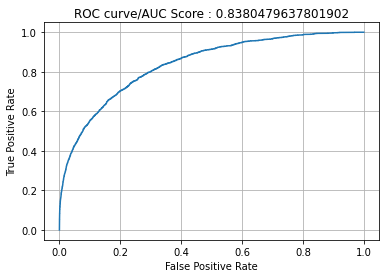

In [11]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(train_y,pred_train_2)
auc_score = roc_auc_score(train_y,pred_train_2)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)

In [13]:
test = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\test.csv')
id = test['id']
pred = pd.DataFrame(pred_test_2)
submit = pd.concat([id,pred], axis=1)
submit.columns = ['id', 'y']
submit

,id,y
0,0,0.797084
1,1,0.062920
2,2,0.035643
3,3,0.002280
4,4,0.060592
...,...,...
18045,18045,0.011949
18046,18046,0.005162
18047,18047,0.095813
18048,18048,0.013155


In [15]:
submit.to_csv('stack5.csv',index=False,header=False)